In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

2024-02-23 18:37:29.939768: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
from tensorflow.keras.layers import Dropout

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


In [4]:
# Compile the model
from tensorflow.keras.optimizers import Adam

# Compile the optimized model
optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer,
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


In [5]:
# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the optimized model with early stopping
history = model.fit(train_images, train_labels, epochs=50,  # Increase epochs
                                        validation_data=(test_images, test_labels),
                                        callbacks=[early_stopping])


Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5871 - accuracy: 0.7903 - val_loss: 0.4320 - val_accuracy: 0.8413
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4303 - accuracy: 0.8464 - val_loss: 0.4092 - val_accuracy: 0.8545
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3963 - accuracy: 0.8576 - val_loss: 0.3759 - val_accuracy: 0.8611
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3751 - accuracy: 0.8641 - val_loss: 0.3715 - val_accuracy: 0.8689
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3623 - accuracy: 0.8698 - val_loss: 0.3618 - val_accuracy: 0.8694
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3466 - accuracy: 0.8747 - val_loss: 0.3622 - val_accuracy: 0.8690
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3335 - accuracy: 0.8786 - val_loss: 0.3455 - val_accuracy:

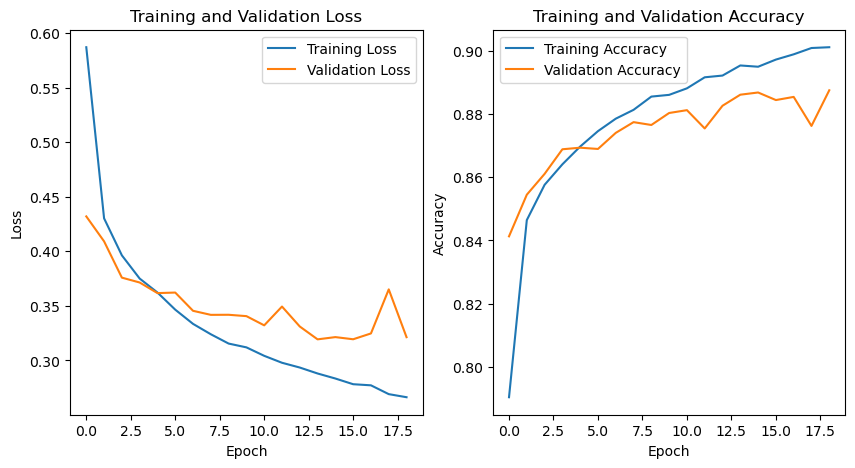

In [6]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 - 0s - loss: 0.3194 - accuracy: 0.8862 - 300ms/epoch - 960us/step
Test Accuracy: 88.62%


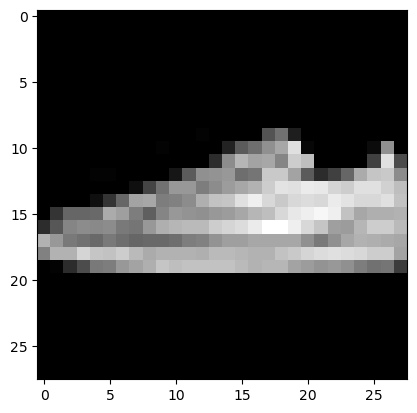

1/1 [==============================] - 0s 65ms/step


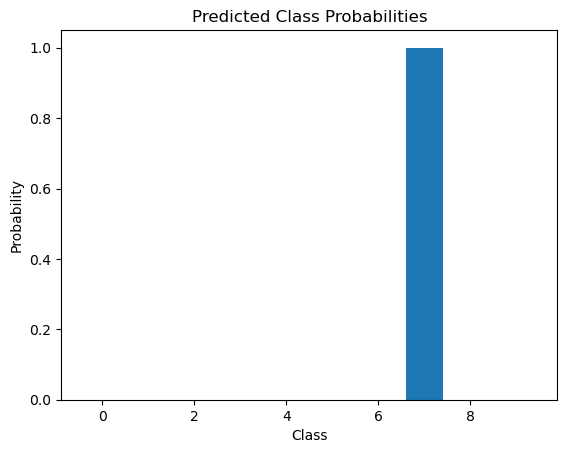

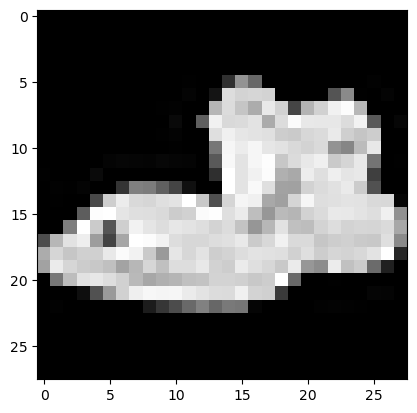

1/1 [==============================] - 0s 14ms/step


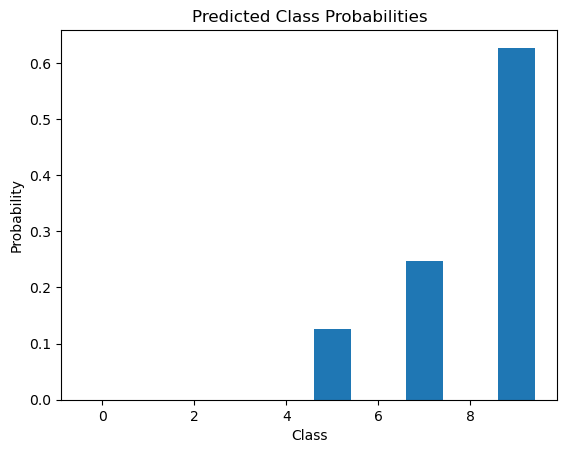

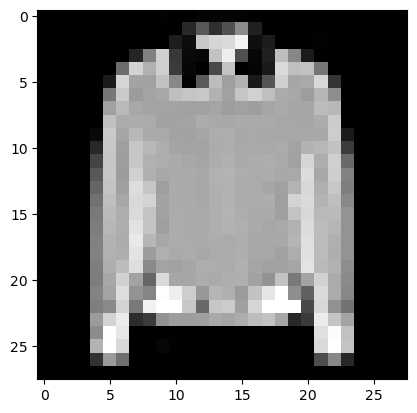

1/1 [==============================] - 0s 14ms/step


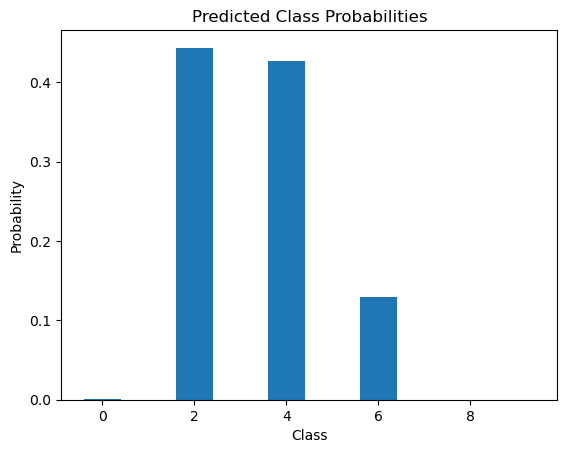

In [7]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Predict and visualize for 3 random test images
np.random.seed(0) # For reproducibility
indices = np.random.choice(range(len(test_images)), 3, replace=False)
for i in indices:
    img = test_images[i]
    plt.imshow(img, cmap='gray')
    plt.show()
    prediction = model.predict(np.array([img]))
    plt.bar(range(10), prediction[0])
    plt.ylabel('Probability')
    plt.xlabel('Class')
    plt.title('Predicted Class Probabilities')
    plt.show()
